In [1]:
import pandas as pd #Reading the dataset
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #for data visualization
import statsmodels.api as sm #statistical data exploration

In [2]:
data=pd.read_excel(r"C:\Users\User\Downloads\Sales_Forecasting.xlsx")

In [3]:
data.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5


In [4]:
data.tail()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
17531,Asia,India,NaN,Delhi,12.0,27.0,2016.0,61.3
17532,Asia,India,NaN,Delhi,12.0,28.0,2016.0,61.7
17533,Asia,India,NaN,Delhi,12.0,29.0,2016.0,59.3
17534,Asia,India,NaN,Delhi,12.0,30.0,2016.0,57.1
17535,Asia,India,NaN,Delhi,12.0,31.0,2016.0,58.3


In [5]:
data.describe()

,State_of_outlet,Month,Day,Year,Total_Sales
count,0.0,17536.000000,17536.000000,17536.000000,17536.000000
mean,NaN,6.524179,15.732892,2010.502053,80.117963
std,NaN,3.449400,8.801978,3.452525,13.315486
min,NaN,1.000000,1.000000,2005.000000,-99.000000
25%,NaN,4.000000,8.000000,2008.000000,77.500000
50%,NaN,7.000000,16.000000,2011.000000,82.600000
75%,NaN,10.000000,23.000000,2014.000000,86.100000
max,NaN,12.000000,31.000000,2016.000000,102.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HQ               17536 non-null  object 
 1   Country          17536 non-null  object 
 2   State_of_outlet  0 non-null      float64
 3   City_of_outlet   17536 non-null  object 
 4   Month            17536 non-null  float64
 5   Day              17536 non-null  float64
 6   Year             17536 non-null  float64
 7   Total_Sales      17536 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [7]:
from datetime import datetime
data['Date'] = data.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

In [8]:
data['Date'].min(), data['Date'].max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00'))

In [9]:
cols = ['Month','Day','Year','City_of_outlet','State_of_outlet','Country','HQ']
data.drop(cols, axis=1, inplace=True)
data = data.sort_values('Date')

In [10]:
data.nunique()

Total_Sales     539
Date           4383
dtype: int64

In [11]:
data.isnull().any()

Total_Sales    False
Date           False
dtype: bool

In [12]:
data

,Total_Sales,Date
0,72.2,2005-01-01
730,75.8,2005-01-01
1095,61.0,2005-01-01
365,66.5,2005-01-01
1,72.7,2005-01-02
...,...,...
16802,67.4,2016-12-30
17169,76.8,2016-12-31
16437,79.7,2016-12-31
16803,67.1,2016-12-31


In [13]:
data.shape

(17536, 2)

In [14]:
data

,Total_Sales,Date
0,72.2,2005-01-01
730,75.8,2005-01-01
1095,61.0,2005-01-01
365,66.5,2005-01-01
1,72.7,2005-01-02
...,...,...
16802,67.4,2016-12-30
17169,76.8,2016-12-31
16437,79.7,2016-12-31
16803,67.1,2016-12-31


In [15]:
Sales_y= data.set_index('Date')
Sales_y.index

DatetimeIndex(['2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-02', '2005-01-02', '2005-01-02', '2005-01-02',
               '2005-01-03', '2005-01-03',
               ...
               '2016-12-29', '2016-12-29', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=17536, freq=None)

In [16]:
Sales_y

,Total_Sales
Date,
2005-01-01,72.2
2005-01-01,75.8
2005-01-01,61.0
2005-01-01,66.5
2005-01-02,72.7
...,...
2016-12-30,67.4
2016-12-31,76.8
2016-12-31,79.7


In [17]:
Sales=Sales_y.copy()

In [18]:
Sales_y.shape

(17536, 1)

In [19]:
pip install tensorflow --ignore-installed --user

^C
Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached wrapt-1.13.3-cp39-cp39-win_amd64.whl (34 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached h5py-3.6.0-cp39-cp39-win_amd64.whl (2.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 k

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Check the permissions.



In [21]:
tf.__version__

'2.8.0'

In [22]:
import keras

In [23]:
keras.__version__

'2.8.0'

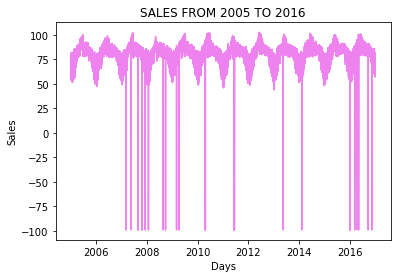

In [24]:
plt.plot(Sales_y, color = 'violet')
plt.title('SALES FROM 2005 TO 2016')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [25]:
monthly_sales = Sales_y['Total_Sales'].resample('MS').mean()

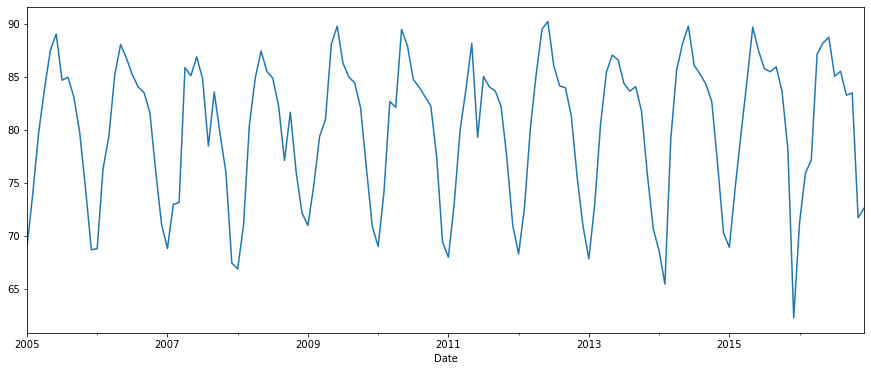

In [26]:
monthly_sales.plot(figsize=(15, 6))
plt.show()

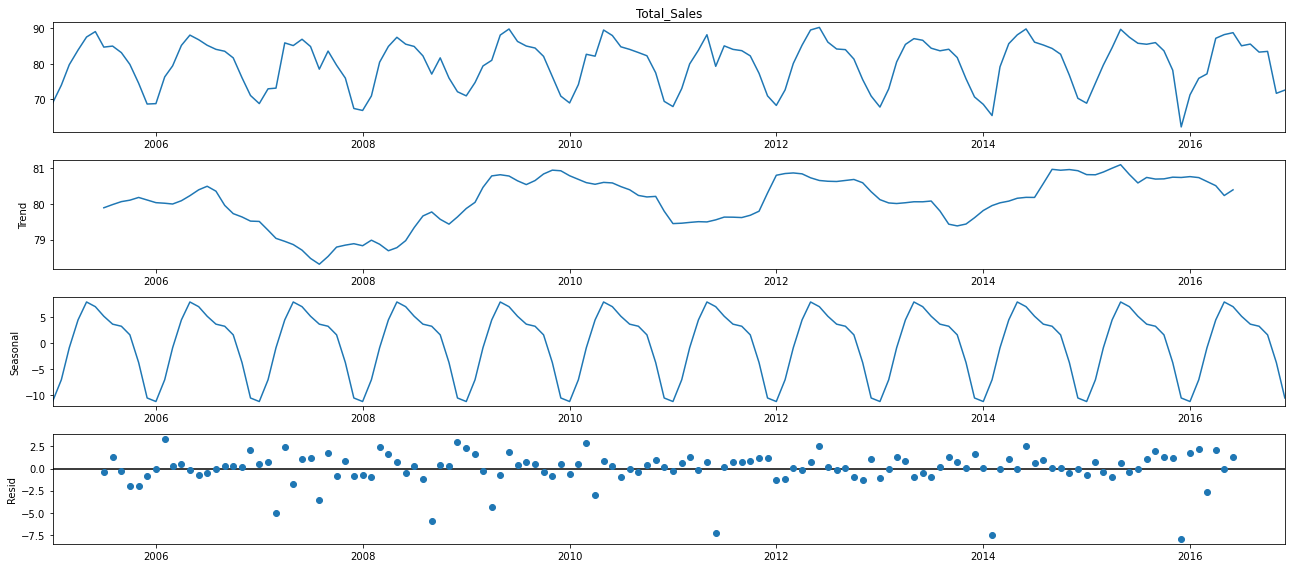

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Sales_y=scaler.fit_transform(np.array(Sales_y).reshape(-1,1))

In [29]:
import pickle
pickle.dump(scaler,open("Scaler_forecast.pkl","wb"))

In [30]:
Sales_y.shape

(17536, 1)

In [31]:
training_size=int(len(Sales_y)*0.63)
test_size=len(Sales_y)-training_size
train_data,test_data=Sales_y[0:training_size,:],Sales_y[training_size:len(Sales_y),:1]

In [32]:
training_size,test_size

(11047, 6489)

In [33]:
train_data

array([[0.84962779],
       [0.8674938 ],
       [0.79404467],
       ...,
       [0.93101737],
       [0.90322581],
       [0.91215881]])

In [34]:
train_data.shape

(11047, 1)

In [35]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [36]:
time_step = 10# considering last year for forecasting
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(11036, 10)
(11036,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(6478, 10)
(6478,)


(None, None)

In [39]:
X_train

array([[0.84962779, 0.8674938 , 0.79404467, ..., 0.77617866, 0.85260546,
        0.8764268 ],
       [0.8674938 , 0.79404467, 0.82133995, ..., 0.85260546, 0.8764268 ,
        0.86004963],
       [0.79404467, 0.82133995, 0.85210918, ..., 0.8764268 , 0.86004963,
        0.75880893],
       ...,
       [0.91116625, 0.93647643, 0.90471464, ..., 0.94342432, 0.9235732 ,
        0.9325062 ],
       [0.93647643, 0.90471464, 0.91662531, ..., 0.9235732 , 0.9325062 ,
        0.90769231],
       [0.90471464, 0.91662531, 0.90818859, ..., 0.9325062 , 0.90769231,
        0.93101737]])

In [40]:
y_train

array([0.86004963, 0.75880893, 0.83325062, ..., 0.90769231, 0.93101737,
       0.90322581])

In [41]:
X_test

array([[0.94540943, 0.92456576, 0.90719603, ..., 0.92059553, 0.92406948,
        0.90818859],
       [0.92456576, 0.90719603, 0.92307692, ..., 0.92406948, 0.90818859,
        0.91761787],
       [0.90719603, 0.92307692, 0.91761787, ..., 0.90818859, 0.91761787,
        0.92456576],
       ...,
       [0.88039702, 0.79751861, 0.81240695, ..., 0.77468983, 0.87047146,
        0.82580645],
       [0.79751861, 0.81240695, 0.78560794, ..., 0.87047146, 0.82580645,
        0.87245658],
       [0.81240695, 0.78560794, 0.89131514, ..., 0.82580645, 0.87245658,
        0.88684864]])

In [42]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [43]:
X_train.shape[0],X_train.shape[1]

(11036, 10)

In [44]:
from tensorflow.keras.models import Sequential#it is a plain stack of layers
from tensorflow.keras.layers import Dense#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import LSTM #Long Short Trem Memory

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
173/173 [==============================] - 21s 55ms/step - loss: 0.0367 - val_loss: 0.0039
Epoch 2/200
 23/173 [==>...........................] - ETA: 5s - loss: 0.0034

KeyboardInterrupt: 

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
ytest[0:5]

In [ ]:
y_pred = model.predict(X_test,batch_size=1)

In [ ]:
y_pred[0:5]

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
look_back=10
trainPredictPlot = np.empty_like(Sales_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(Sales_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Sales_y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Sales_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
model.save("sales_forecast.h5")

In [ ]:
len(Sales)

In [ ]:
Sales=np.array(Sales)

In [ ]:
x_input=Sales[4372:4382].reshape(1,-1)
x_input.shape

In [ ]:
x_input

In [ ]:
len(test_data)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
len(temp_input)

In [ ]:
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>=10):
        #print("temp_input",temp_input)
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        x_input=np.expand_dims(x_input, axis=0)
        #x_input=scaler.transform(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat=scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print("Please give 10 number of inputs")

In [ ]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [ ]:
len(Sales_y)